# 克里金(Kriging)插值的原理

了解过空间插值的人都知道克里金插值，但是它的变种繁多、公式复杂  
本文将简单介绍基本克里金插值的原理



## 0 前言 --从反距离插值(IDW)说起

空间插值问题，就是在已知空间上若干离散点 $(x_i,y_i)$ 的某一属性(如气温，海拔)的观测值$z_i=z(x_i,y_i)$的条件下，估计空间上任意一点$(x,y)$的属性值的问题。

直观来讲，根据地理学第一定律，  
```
All attribute values on a geographic surface are related to each other, but closer values are more strongly related than are more distant ones.
```

大意就是，地理属性有空间相关性，相近的事物会更相似。由此人们发明了反距离插值，对于空间上任意一点 $(x,y)$ 的属性 $z=z(x,y)$ ，定义反距离插值公式估计量
$$\hat{z} = \sum^{n}_{i=1}{\frac{1}{d^\alpha}z_i}$$

其中$\alpha $通常取1或者2。  

即，用空间上所有已知点的数据加权求和来估计未知点的值，权重取决于距离的倒数（或者倒数的平方）。那么，距离近的点，权重就大；距离远的点，权重就小。  
反距离插值可以有效的基于地理学第一定律估计属性值空间分布，但仍然存在很多问题：  
    (1)$\alpha $ 的值不确定  
    (2)用倒数函数来描述空间关联程度不够准确   
    
因此更加准确的克里金插值方法被提出来了
   

# 1 克里金插值的定义

克里金法（Kriging  method）是依据**协方差函数**对**随机过程**/随机场进行空间建模和预测（插值）的回归算法。   
相比反距离插值，克里金插值公式更加抽象
$$\hat{z_o} = \sum^{n}_{i=0}{\lambda_iz_i} $$
其中$\hat{z_o}$是点$(x_o,y_o)$处的估计值，即$z_o=z(x_o,y_o)$  
这里的$\lambda_i$是权重系数。它同样是用空间上所有已知点的数据加权求和来估计未知点的值。但权重系数并非距离的倒数，而是能够满足点$(x_o,y_o)$处的估计值$\hat{z_o}$与真实值$z_o$的差最小的一套最优系数，即
$$\min_{\lambda_i} Var(\hat{z_o}-z_o)$$
同时满足无偏估计的条件
$$E(\hat{z_o}-z_o)=0$$
无偏指的是估计值和实际值之差的期望等于零，最优指的是估计值和实际值的方差最小。  
简单来说克里金（kriging）插值干的事情就是：已经有一些坐标和这些坐标处的真实值，我们可以称之为采样点。然后把这些采样点输入到克里金插值中，我们就可以用来估计其他未知位置处的值。

# 2 算法

  -普通克里金（Ordinary Kriging, OK）  
**改进算法：**  
  -泛克里金（Universal Kriging, UK）  
  -协同克里金（Co-Kriging, CK）  
  -析取克里金（Disjunctive Kriging, DK）  
**混合算法：**   
  -回归克里金（regression-Kriging）  
  -神经网络克里金（neural Kriging）  
  -贝叶斯克里金（Bayesian Kriging）  

# 3 假设条件

**不同的克里金插值方法的主要差异就是假设条件不同**。本文仅介绍普通克里金插值的假设条件与应用。  
普通克里金插值的假设条件为，空间属性z是均一的。对于空间任意一点$(x,y)$，都有同样的期望c与方差$\sigma^2$。  即对任意点$(x,y)$都有$$E[z(x,y)] = E[z] = c$$

$$Var[z(x,y)] = \sigma^2$$
换一种说法：任意一点处的值$z(x,y)$，都由区域平均值c和该点的随机偏差$R(x,y)$组成，即

$$z(x,y)=E[z(x,y)] + R(x,y)= c + R(x,y)$$

其中$R(x,y)$表示点$(x,y)$处的偏差，其方差均为常数

$$Var[R(x,y)] = \sigma^2$$






# 4 无偏约束条件

先分析无偏估计条件$E(\hat{z_o}-z_o)=0$，将$\hat{z_o} = \sum^{n}_{i=0}{\lambda_iz_i}$带入则有

$E(\sum^{n}_{i=0}{\lambda_iz_i}- z_o)=0$

又因为对任意的z都有$E[z] = c$，则

$c \sum^{n}_{i=0}{\lambda_i}- c=0$

即

$\sum^{n}_{i=0}{\lambda_i} = 1$

这是$\lambda_i$的约束条件之一。

# 5 优化目标/代价函数J

再分析估计误差$Var(\hat{z_o}-z_o)$。为方便公式推理，用符号$J$表示，即

$J = Var(\hat{z_o}-z_o)$

则有

\begin{array}{r@{\;=\;}l} J= Var(\sum^{n}_{i=0}{\lambda_iz_i} - z_o) = Var(\sum^{n}_{i=0}{\lambda_iz_i}) - 2 Cov(\sum^{n}_{i=0}{\lambda_iz_i}, z_o) + Cov(z_o, z_o) = \sum^{n}_{i=0}\sum^{n}_{j=0}{\lambda_i\lambda_jCov( z_i, z_j)} - 2 \sum^{n}_{i=0}{\lambda_iCov(z_i, z_o)} + Cov(z_o, z_o) \end{array}

为简化描述，定义符号 $C_{ij} = Cov(z_i,z_j) = Cov(R_i,R_j)$，这里$R_i = z_i - c$，即点$(x_i,y_i)$处的属性值相对于区域平均属性值的偏差。

则有

$J = \sum^{n}_{i=0}\sum^{n}_{j}{\lambda_i\lambda_jC_{ij}} - 2 \sum^{n}_{i=0}{\lambda_iC_{io}} + C_{oo} $

# 6 代价函数的最优解

再定义半方差函数 $r_{ij} = \sigma^2 -C_{ij}$，带入$J$中，有$$\begin{array}{r@{\;=\;}l}J = \sum^{n}_{i=0}\sum^{n}_{j=0}{\lambda_i\lambda_j(\sigma^2 - r_{ij})} - 2 \sum^{n}_{i=0}{\lambda_i(\sigma^2 - r_{io})} + \sigma^2 - r_{oo} =\sum^{n}_{i=0}\sum^{n}_{j=0}{\lambda_i\lambda_j(\sigma^2)} -\sum^{n}_{i=0}\sum^{n}_{j=0}{\lambda_i\lambda_j( r_{ij})}-2\sum^{n}_{i=0}{\lambda_i(\sigma^2)}+2 \sum^{n}_{i=0}{\lambda_i(r_{io})}+\sigma^2 - r_{oo} \end{array} $$
考虑到$\sum^{n}_{i=0}{\lambda_i} = 1$
$\begin{array}{r@{\;=\;}l}J = \sigma^2-\sum^{n}_{i=0}\sum^{n}_{j}{\lambda_i\lambda_j(r_{ij})}-2 \sigma^2 +2 \sum^{n}_{i=0}{\lambda_i(r_{io})}+ \sigma^2 - r_{oo}=2 \sum^{n}_{i=0}{\lambda_i(r_{io})} -\sum^{n}_{i=0}\sum^{n}_{j=0}{\lambda_i\lambda_j(r_{ij})} - r_{oo} \end{array} $
我们的目标是寻找使$J$最小的一组 $\lambda_i$，且$J$是$\lambda_i$的函数，因此直接将$J$对$\lambda_i$求偏导数令其为0即可。即
$\frac{\partial J}{\partial \lambda_i}= 0;i=1,2,\cdots$

但是要注意的是，我们要保证求解出来的最优 $\lambda_i$ 满足公式$\sum^{n}_{i=0}{\lambda_i} = 1$，这是一个带约束条件的最优化问题。使用拉格朗日乘数法求解，求解方法为构造一个新的目标函数$$J + \phi(\sum^{n}_{i=0}{\lambda_i}-1)$$
其中$\phi$是拉格朗日乘数。求解使这个代价函数最小的参数集${\phi,\lambda_1,\lambda_2,\cdots,\lambda_n}$，则能满足其在$\sum^{n}_{i=0}{\lambda_i} = 1$约束下最小化$J$。即

$\left\{\begin{array}{r@{\;=\;}l}\frac{\partial(J + \phi(\sum^{n}_{i=0}{\lambda_i}-1))}{\partial \lambda_i} = 0;i=1,2,\cdots,n\\ \frac{\partial(J + \phi(\sum^{n}_{i=0}{\lambda_i}-1))}{\partial \phi} = 0 \end{array} \right. $

$\left\{\begin{array}{r@{\;=\;}l} \frac{\partial (2 \sum^{n}_{i=0}{\lambda_i(r_{io})} - \sum^{n}_{i=0}\sum^{n}_{j}{\lambda_i\lambda_j(r_{ij})} - r_{oo})}{\partial \lambda_i}= 0;i=1,2,\cdots,n\\ \frac{\partial (\partial 2 \sum^{n}_{i=0}{\lambda_i(r_{io})} - \sum^{n}_{i=0}\sum^{n}_{j}{\lambda_i\lambda_j(r_{ij})} - r_{oo})}{\partial \phi} = 0 \end{array} \right.$

$\left\{\begin{array}{r@{\;=\;}l} 2r_{io} - \sum^{n}_{j=1}{(r_{ij}+r_{ji})\lambda_j}=0;i=1,2,\cdots,n\\ \sum^{n}_{i=0}{\lambda_i} = 1 \end{array} \right.$
由于$C_{ij}=Cov(z_i,z_j)=C_{ji}$，因此同样地$r_{ij}=r_{ji}$，那么有

$\left\{\begin{array}{r@{\;=\;}l} r_{io} - \sum^{n}_{j=1}{r_{ij}\lambda_j} = 0;i=1,2,\cdots,n\\ \sum^{n}_{i=0}{\lambda_i} = 1 \end{array} \right.$
式子中半方差函数$r_{ij}$十分重要，最后会详细解释其计算与定义
在以上计算中我们得到了对于求解权重系数$\lambda_j$的方程组。写成线性方程组的形式就是：
$\begin{equation}\left\{\begin{array}{r@{\;=\;}l} r_{11}\lambda_1 + r_{12}\lambda_2 + \cdots + r_{1n}\lambda_n + \phi= r_{1o}\\r_{21}\lambda_1 + r_{22}\lambda_2 + \cdots + r_{2n}\lambda_n + \phi= r_{2o}\\&\cdots\\ r_{n1}\lambda_1 + r_{n2}\lambda_2 + \cdots + r_{nn}\lambda_n + \phi= r_{no}\\ \lambda_1 + \lambda_2 + \cdots + \lambda_n &= 1\\ \end{array} \right.\end{equation}$
写成矩阵形式即为
$\begin{bmatrix}r_{11}&r_{12}&\cdots&r_{1n}&1\\ r_{21}&r_{22}&\cdots&r_{2n}&1\\\cdots&\cdots&\cdots&\cdots&\cdots\\r_{n1}&r_{n2}&\cdots&r_{nn}&1\\1&1&\cdots&1&0\end{bmatrix}\begin{bmatrix} \lambda_1\\ \lambda_2\\\cdots\\\lambda_n\\0\end{bmatrix}=\begin{bmatrix} r_{1o}\\ r_{2o}\\\cdots\\r_{no}\\1\end{bmatrix}$
对矩阵求逆即可求解。

唯一未知的就是上文中定义的半方差函数$r_{ij}$，接下来将详细讨论

# 7 半方差函数

上文中对半方差函数的定义为

$r_{ij} = \sigma^2 -C_{ij}$

其等价形式为

$r_{ij} = \frac{1}{2}E[(z_i-z_j)^2]$

这也是半方差函数名称的来由，接下来证明这二者是等价的：

根据上文定义 $R_i = z_i - c$，有$z_i-z_j = R_i - R_j$，则

$\begin{array}{r@{\;=\;}l} r_{ij} &= \frac{1}{2}E[(R_i-R_j)^2]\&= \frac{1}{2}E[R_i^2-2R_iR_j+R_j^2]\&= \frac{1}{2}E[R_i^2]+\frac{1}{2}E[R_j^2]-E[R_iR_j] \end{array} $

又因为：

$E[R_i^2] =E[R_j^2] = E[(z_i - c)^2] = Var(z_i) = \sigma^2 $

$E[R_iR_j] = E[(z_i - c)(z_j-c)] = Cov(z_i,z_j) = C_{ij}$

于是有

$\begin{array}{r@{\;=\;}l} r_{ij} &= \frac{1}{2}E[(z_i-z_j)^2]\\&= \frac{1}{2}E[R_i^2]+\frac{1}{2}E[R_j^2]-E[R_iR_j]\\&= \frac{1}{2}\sigma^2+\frac{1}{2}\sigma^2- C_{ij}\\&=\sigma^2 -C_{ij}\end{array}$

$ \sigma^2 -C_{ij} = \frac{1}{2}E[(z_i-z_j)^2]$得证，现在的问题就是如何计算

$$r_{ij} = \frac{1}{2}E[(z_i-z_j)^2]$$

这时需要用到地理学第一定律，空间上相近的属性相近。$(r_{ij} = \frac{1}{2}(z_i-z_j)^2$表达了属性的相似度；空间的相似度就用距离来表达，定义i与j之间的几何距离
$d_{ij} = d(z_i,z_j) = d( (x_i,y_i), (x_j,y_j)) = \sqrt{(x_i-x_j)^2 + (y_i - y_j)^2}$

克里金插值假设$r_{ij}$与$d_{ij}$存在着函数关系，这种函数关系可以是线性、二次函数、指数、对数关系。为了确认这种关系，我们需要首先对观测数据集

$\{z(x_1,y_1),z(x_2,y_2),z(x_3,y_3),\cdots,z(x_{n-1},y_{n-1}),z(x_n,y_n)\}$

计算任意两个点的 距离$d_{ij}= \sqrt{(x_i-x_j)^2 + (y_i - y_j)^2}$和 半方差 $\sigma^2 -C_{ij} =\frac{1}{2}E[(z_i-z_j)^2]$，这时会得到$n^2$个$(d_{ij}, r_{ij})$的数据对。

将所有的$d$和$r$绘制成散点图，寻找一个最优的拟合曲线拟合$d$与$r$的关系，得到函数关系式

$r = r(d)$

那么对于任意两点$(x_i,y_i), (x_j,y_j)$，先计算其距离$d_{ij}$，然后根据得到的函数关系就可以得到这两点的半方差$r_{ij}$

# 8 简单克里金（simple kriging）与普通克里金（ordinary kriging）的区别

以上介绍的均为普通克里金（ordinary kriging）的公式与推理。

事实上普通克里金插值还有简化版，即简单克里金（simple kriging）插值。二者的差异就在于如何定义插值形式：

上文讲到，普通克里金插值形式为

$\hat{z_o} = \sum^{n}_{i=0}{\lambda_iz_i}$

而简单克里金的形式则为

$\hat{z_o} - c= \sum^{n}_{i=0}{\lambda_i(z_i-c)}$

这里的符号c在上文介绍过了，是属性值的数学期望，即$E[z] = c$。也就是说，在普通克里金插值中，认为未知点的属性值是已知点的属性值的加权求和；而在简单克里金插值中，假设未知点的属性值相对于平均值的偏差是已知点的属性值相对于平均值的偏差的加权求和，用公式表达即为：

$\hat{R_o} = \sum^{n}_{i=0}{\lambda_iR_i}$

这里的$R_i$在上文定义过了：$R_i = z_i - c$。

但是为什么这样的克里金插值称为“简单克里金”呢？由于有假设$E[z] = c$，也就是说$E(R_i + c) = c$，即$E(R_i) = 0$。那么上面的公式$\hat{R_o} = \sum^{n}_{i=0}{\lambda_iR_i}$两边的期望一定相同，那么在求解未知参数$\lambda_i$就不需要有无偏约束条件$\sum^{n}_{i=0}{\lambda_i} = 1$。换句话说，这样的估计公式天生就能满足无偏条件。因此它被称为简单克里金。

从在上文（第5节优化目标/代价函数J）中可以知道，优化目标的推理和求解过程是通过对属性值相对于期望的偏差量$R_i$进行数学计算而进行的。也就是说这两种克里金插值方法虽然插值形式不一样，求解方法是一样的，重要的区别是简单克里金插值不需要约束条件$\sum^{n}_{i=0}{\lambda_i} = 1$，求解方程组为：
$\begin{equation}\left\{\begin{array}{r@{\;=\;}l} r_{11}\lambda_1 + r_{12}\lambda_2 + \cdots + r_{1n}\lambda_n + \phi&= r_{1o}\\ r_{21}\lambda_1 + r_{22}\lambda_2 + \cdots + r_{2n}\lambda_n + \phi&= r_{2o}\\&\cdots\\ r_{n1}\lambda_1 + r_{n2}\lambda_2 + \cdots + r_{nn}\lambda_n + \phi&= r_{no}\\ \end{array} \right.\end{equation}$

还有更重要的一点，简单克里金的插值公式为：

$\hat{z_o} = \sum^{n}_{i=0}{\lambda_i(z_i-c)}+c$

换句话说，在计算未知点属性值$\hat{z_o}$前，需要知道该地区的属性值期望c。事实上我们在进行插值前很难知道这个地区的真实属性值期望。有些研究者可能会采用对观测数据简单求平均的方法计算期望值c，而考虑到空间采样点位置代表性可能有偏差（比如采样点聚集在某一小片地区，没有代表性），简单平均估计的期望也可能是有偏差的。这是简单克里金方法的局限性。

# 9 小结

总的来说，进行克里金插值分为这几个步骤：  
1、对于**观测数据**，两两计算距离与半方差  
2、寻找一个拟合曲线拟合距离与半方差的关系，从而能根据**任意距离计算出相应的半方差**  
3、计算出所有已知点之间的半方差$r_{ij}$    
4、对于未知点$z_0$，计算它到所有已知点$z_i$的半方差$r_{io}$  5、求解第五节中的方程组，得到最优系数$\lambda_i$    
6、使用最优系数对已知点的属性值进行加权求和，得到未知点$z_o$的估计值


**在Python里，有两个GitHub评分比较高的克里金插值包，pykrige和pykriging。**  
# python中Kriging算法:  
  ``` OrdinaryKriging```： 2D ordinary kriging with estimated mean  
  
  ``` UniversalKriging```:2D universal kriging providing drift terms  
  
  ```OrdinaryKriging3D: ```3D ordinary kriging  
  
  ```UniversalKriging3D: ```3D universal kriging  
  
  ```RegressionKriging:``` An implementation of Regression-Kriging 
  
  ```ClassificationKriging:``` An implementation of Simplicial Indicator Kriging  

# Using pyKrige

## Ordinary Kriging Example

In [26]:
#下面代码给出了使用普通克里金进行插值的一个简单例子，其他类型的克里金插值类似。
from pykrige.ok import OrdinaryKriging
import numpy as np
from matplotlib import pyplot as plt

In [27]:
# 已知采样点的数据，是坐标（x，y）和坐标对应的值
# 矩阵中第一列是x,第二列是y,第三列是坐标对应的值
data = np.array(
    [
        [0.1, 0.1, 0.9],
        [0.2, 0.1, 0.8],
        [0.1, 0.3, 0.9],
        [0.5, 0.4, 0.5],
        [0.3, 0.3, 0.7],
    ])

In [33]:
# 网格
x_range = 0.6
y_range = 0.6
range_step = 0.1
gridx = np.arange(0.0, x_range, range_step) #三个参数的意思：范围0.0 - 0.6 ，每隔0.1划分一个网格
gridy = np.arange(0.0, y_range, range_step)

In [34]:
ok3d = OrdinaryKriging(
    data[:, 0],
    data[:, 1], 
    data[:, 2], 
    variogram_model="linear") # 模型
# variogram_model是变差函数模型，pykrige提供 linear, power, gaussian, spherical, exponential, hole-effect几种variogram_model可供选择，默认的为linear模型。
# 使用不同的variogram_model，预测效果是不一样的，应该针对自己的任务选择合适的variogram_model。

In [35]:
k3d1, ss3d = ok3d.execute("grid", gridx, gridy) # k3d1是结果，给出了每个网格点处对应的值
print(np.round(k3d1,2))

[[0.91 0.87 0.81 0.75 0.7 0.66]
 [0.92 0.9 0.8 0.74 0.68 0.63]
 [0.92 0.89 0.81 0.72 0.65 0.59]
 [0.91 0.9 0.8 0.7 0.62 0.55]
 [0.88 0.84 0.77 0.68 0.59 0.5]
 [0.84 0.8 0.74 0.67 0.59 0.53]]


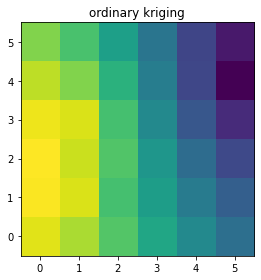

In [36]:
# 绘图
fig, (ax1) = plt.subplots(1)
ax1.imshow(k3d1, origin="lower")
ax1.set_title("ordinary kriging")
plt.tight_layout()
plt.show()
#黄色是值比较大的区域

## Universal Kriging Example

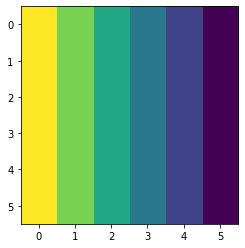

In [39]:
from pykrige  import UniversalKriging
UK = UniversalKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model="linear",
     drift_terms=["regional_linear"],
)
z, ss = UK.execute("grid", gridx, gridy)
plt.imshow(z)
plt.show()


## Three-Dimensional Kriging Example

In [49]:
from pykrige import OrdinaryKriging3D
from pykrige  import UniversalKriging3D
data = np.array(
    [
        [0.1, 0.1, 0.3, 0.9],
        [0.2, 0.1, 0.4, 0.8],
        [0.1, 0.3, 0.1, 0.9],
        [0.5, 0.4, 0.4, 0.5],
        [0.3, 0.3, 0.2, 0.7],
    ]
)
gridx = np.arange(0.0, 0.6, 0.05)
gridy = np.arange(0.0, 0.6, 0.01)
gridz = np.arange(0.0, 0.6, 0.1)
ok3d = OrdinaryKriging3D(
    data[:, 0], data[:, 1], data[:, 2], data[:, 3], variogram_model="linear"
)
k3d1, ss3d = ok3d.execute("grid", gridx, gridy, gridz)

uk3d = UniversalKriging3D(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    data[:, 3],
    variogram_model="linear",
    drift_terms=["regional_linear"],
)
k3d2, ss3d = uk3d.execute("grid", gridx, gridy, gridz)


In [50]:
zg, yg, xg = np.meshgrid(gridz, gridy, gridx, indexing="ij")
uk3d = UniversalKriging3D(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    data[:, 3],
    variogram_model="linear",
    drift_terms=["specified"],
    specified_drift=[data[:, 0], data[:, 1], data[:, 2]],
)
k3d3, ss3d = uk3d.execute(
    "grid", gridx, gridy, gridz, specified_drift_arrays=[xg, yg, zg]
)

In [51]:
func = lambda x, y, z: x
uk3d = UniversalKriging3D(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    data[:, 3],
    variogram_model="linear",
    drift_terms=["functional"],
    functional_drift=[func],
)
k3d4, ss3d = uk3d.execute("grid", gridx, gridy, gridz)

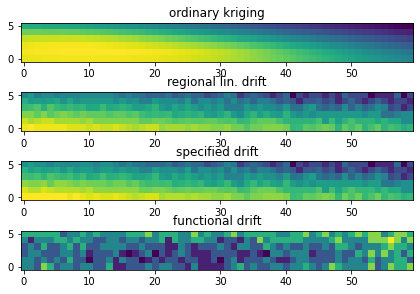

In [52]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
ax1.imshow(k3d1[:, :, 0], origin="lower")
ax1.set_title("ordinary kriging")
ax2.imshow(k3d2[:, :, 0], origin="lower")
ax2.set_title("regional lin. drift")
ax3.imshow(k3d3[:, :, 0], origin="lower")
ax3.set_title("specified drift")
ax4.imshow(k3d4[:, :, 0], origin="lower")
ax4.set_title("functional drift")
plt.tight_layout()
plt.show()

## Geometric example

In [66]:
#A small example script showing the usage of the 'geographic' coordinates type for ordinary kriging on a sphere.
from pykrige  import OrdinaryKriging
import numpy as np
from matplotlib import pyplot as plt
# Make this example reproducible:
np.random.seed(89239413)
N = 7
lon = 360.0 * np.random.random(N)
lat = 180.0 / np.pi * np.arcsin(2 * np.random.random(N) - 1)
z = 3.5 * np.random.rand(N) + 2.0

In [67]:
# Generate a regular grid with 60° longitude and 30° latitude steps:
grid_lon = np.linspace(0.0, 360.0, 7)
grid_lat = np.linspace(-90.0, 90.0, 7)


In [68]:
# Create ordinary kriging object:
OK = OrdinaryKriging(
    lon,
    lat,
    z,
    variogram_model="linear",
    verbose=False,
    enable_plotting=False,
    coordinates_type="geographic",
)
OK

In [69]:
# Execute on grid:
z1, ss1 = OK.execute("grid", grid_lon, grid_lat)
z1

masked_array(
  data=[[3.134704744043927, 3.1347047440439266, 3.134704744043927,
         3.134704744043927, 3.1347047440439275, 3.1347047440439306,
         3.134704744043927],
        [3.3535591813910415, 3.1721445373625916, 2.8983146427909974,
         3.2308127628448027, 3.4153256708891133, 3.249786839629165,
         3.3535591813910415],
        [3.90050621078463, 3.5570989565583204, 2.6365509707773107,
         3.5636417324050544, 3.983305797386942, 4.0392191202177825,
         3.9005062107846307],
        [4.4987786283218885, 3.9661869810152046, 3.3701782065887658,
         4.025716707060881, 4.558308354367576, 5.154317128794011,
         4.498778628321889],
        [4.960853602977717, 4.541189537995839, 4.4852762151649985,
         4.623989124598145, 4.96739637882445, 5.887944364605459,
         4.960853602977716],
        [5.293682572537973, 5.109169664493659, 5.274708495753611,
         5.170936153991732, 5.352350798020184, 5.626180692591777,
         5.293682572537971],
    

In [70]:
# Create ordinary kriging object ignoring curvature:
OK = OrdinaryKriging(
    lon, lat, z, variogram_model="linear", verbose=False, enable_plotting=False
)
# Execute on grid:
z2, ss2 = OK.execute("grid", grid_lon, grid_lat)
z2

masked_array(
  data=[[3.502425679091628, 3.2044968566228285, 3.0175265707261976,
         3.2703135982014713, 3.540062333954411, 3.726097565994089,
         3.8489509626640315],
        [3.6444668200653223, 3.298245084129646, 2.8426569107138664,
         3.348304293520625, 3.6748313668002544, 3.852965073106008,
         3.958933438447449],
        [3.8342624679924167, 3.5556232663655996, 2.665889858268505,
         3.5369228451833163, 3.8615562411806788, 4.003952916085274,
         4.08117468430286],
        [4.061003569995997, 3.8437699611193112, 3.392844638179076,
         3.8979255328937623, 4.098901008280758, 4.173898062037882,
         4.212114907248041],
        [4.308421105001517, 4.300362632429383, 4.500010883116927,
         4.398876366214719, 4.3630402414493625, 4.352240688034109,
         4.346563840678506],
        [4.548060263127832, 4.723978493333384, 5.251174930885873,
         4.820182407108507, 4.612844884719104, 4.525480570459167,
         4.478576004506351],
       

In [71]:
# Print data at equator (last longitude index will show periodicity):
print("Original data:")
print("Longitude:", lon.astype(int))
print("Latitude: ", lat.astype(int))
print("z:        ", np.array_str(z, precision=2))
print("\nKrige at 60° latitude:\n======================")
print("Longitude:", grid_lon)
print("Value:    ", np.array_str(z1[5, :], precision=2))
print("Sigma²:   ", np.array_str(ss1[5, :], precision=2))
print("\nIgnoring curvature:\n=====================")
print("Value:    ", np.array_str(z2[5, :], precision=2))
print("Sigma²:   ", np.array_str(ss2[5, :], precision=2))

Original data:
Longitude: [122 166  92 138  86 122 136]
Latitude:  [-46 -36 -25 -73 -25  50 -29]
z:         [2.75 3.36 2.24 3.07 3.37 5.25 2.82]

Krige at 60° latitude:
Longitude: [  0.  60. 120. 180. 240. 300. 360.]
Value:     [5.29 5.11 5.27 5.17 5.35 5.63 5.29]
Sigma²:    [2.22 1.32 0.42 1.21 2.07 2.48 2.22]

Ignoring curvature:
Value:     [4.55 4.72 5.25 4.82 4.61 4.53 4.48]
Sigma²:    [3.79 2.   0.39 1.85 3.54 5.46 7.53]


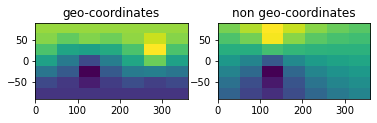

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(z1, extent=[0, 360, -90, 90], origin="lower")
ax1.set_title("geo-coordinates")
ax2.imshow(z2, extent=[0, 360, -90, 90], origin="lower")
ax2.set_title("non geo-coordinates")
plt.show()

# Using pyKriging

pyKriging 旨在简化创建代理模型的过程。以下示例演示了如何创建抽样计划,评估这些位置的测试函数,创建和训练克里金模型并添加填充点以减少模型的均方误差 (MSE)。

In [12]:
import pyKriging  
from pyKriging.krige import kriging  
from pyKriging.samplingplan import samplingplan

In [15]:
# The Kriging model starts by defining a sampling plan, we use an optimal Latin Hypercube (最优的拉丁超立方体)here
sp = samplingplan(2) 

X = sp.optimallhc(20)
X

Now_optimizing_for_q = 1 

Now_optimizing_for_q = 2 

Now_optimizing_for_q = 5 

Now_optimizing_for_q = 10 

Now_optimizing_for_q = 20 

Now_optimizing_for_q = 50 

Now_optimizing_for_q = 100 

Best_lh_found_using_q = 2 



array([[0.675, 0.125],
       [0.125, 0.325],
       [0.575, 0.475],
       [0.275, 0.625],
       [0.525, 0.225],
       [0.375, 0.025],
       [0.725, 0.375],
       [0.825, 0.575],
       [0.925, 0.725],
       [0.975, 0.075],
       [0.625, 0.975],
       [0.175, 0.925],
       [0.425, 0.875],
       [0.775, 0.825],
       [0.225, 0.175],
       [0.075, 0.525],
       [0.475, 0.675],
       [0.325, 0.425],
       [0.875, 0.275],
       [0.025, 0.775]])

In [19]:
# Next, we define the problem we would like to solve
testfun = pyKriging.testfunctions().branin  
y = testfun(X)

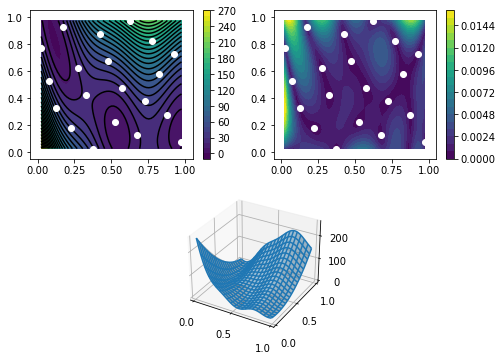

In [25]:
# Now that we have our initial data, we can create an instance of a Kriging model
k = kriging(X, y, testfunction=testfun, name='simple')  
k.train()
# Now, five infill points are added. Note that the model is re-trained after each point is added
numiter = 5 
for i in range(numiter):
    #print "Infill iteration {0} of {1}....".format(i + 1, numiter)
    newpoints = k.infill(1)
    for point in newpoints:
        k.addPoint(point, testfun(point)[0])
    k.train()
# And plot the results
k.plot()  